In [1]:
import librosa
audio_file_path=r"C:\Users\samar\Projects\Audio Classfication\UrbanSound8K\audio\fold2\4201-3-0-0.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [3]:
print(librosa_audio_data)

[ 1.8626451e-09  9.3132257e-10  9.3132257e-10 ... -7.4704364e-02
 -7.4095540e-02 -5.3287197e-02]


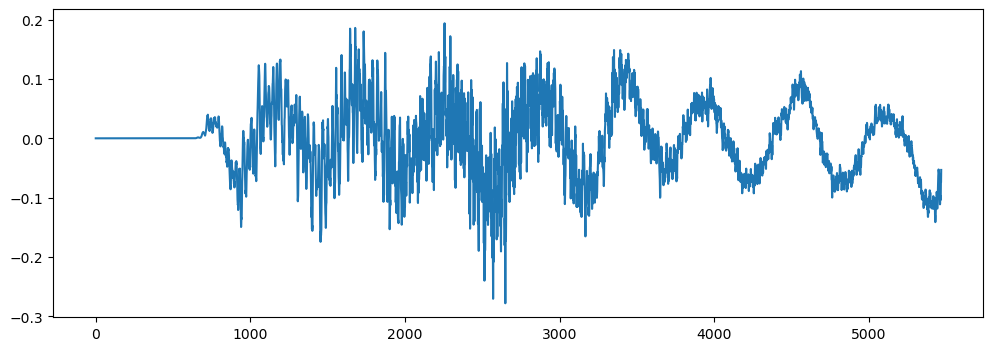

In [5]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [6]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [8]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-2357, -2032],
       [-2327, -2161],
       [-2596, -2295]], dtype=int16)

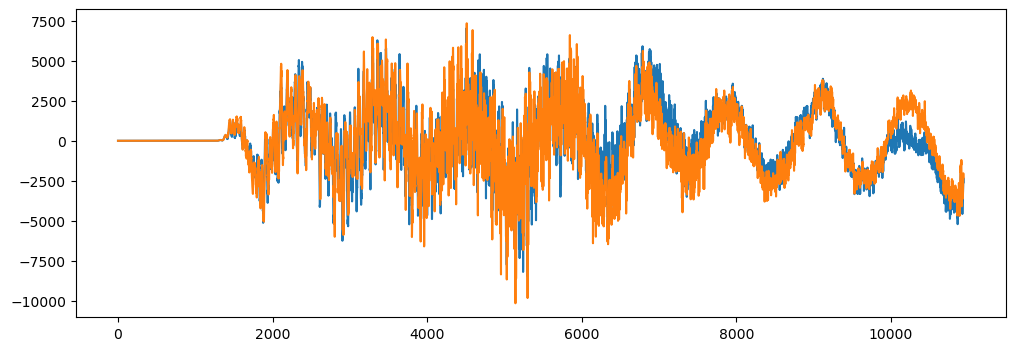

In [11]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [14]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 11)


In [16]:
mfccs

array([[-5.56250671e+02, -2.92780060e+02, -1.89485977e+02,
        -1.52066071e+02, -1.38720932e+02, -1.41781662e+02,
        -1.59671555e+02, -1.88704636e+02, -2.16614120e+02,
        -2.32400604e+02, -2.32629410e+02],
       [ 1.26293945e+02,  1.34661865e+02,  1.24447815e+02,
         1.03005913e+02,  8.75494690e+01,  8.96251755e+01,
         9.07113113e+01,  8.75928650e+01,  8.08561096e+01,
         8.12981873e+01,  9.19153137e+01],
       [ 2.36688862e+01,  1.17499714e+01, -7.56043017e-01,
        -1.34529324e+01, -1.31844501e+01,  2.90303081e-01,
         2.99374270e+00,  5.78962326e+00,  3.05416012e+00,
         9.08952999e+00,  9.62407112e+00],
       [-3.23198557e+00, -5.77053165e+00, -3.08825064e+00,
         5.01492739e+00,  1.06555862e+01,  1.04694786e+01,
         1.09307537e+01,  1.27465839e+01,  1.68089218e+01,
         1.52767248e+01,  1.27561274e+01],
       [-7.96021938e+00, -1.82542629e+01, -2.16429405e+01,
        -3.11777802e+01, -4.59349213e+01, -5.39010773e+01,
  

In [18]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r"C:\Users\samar\Projects\Audio Classfication\UrbanSound8K\audio"
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [20]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [22]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3553it [02:51, 21.90it/s]C:\Users\samar\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [06:29, 25.91it/s]C:\Users\samar\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\samar\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [06:47, 21.44it/s]


In [24]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [26]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [28]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [30]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [34]:

y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [36]:
X_train.shape

(6985, 40)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [40]:
### No of classes
num_labels=y.shape[1]

In [42]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\samar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [50]:
import os
os.makedirs('saved_models', exist_ok=True)


In [56]:
checkpointer = ModelCheckpoint(
    filepath='saved_models/audio_classification.h5',
    monitor='val_accuracy',  # Monitor validation accuracy
    verbose=1,
    save_best_only=True
)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=saved_models/audio_classification.h5

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

# checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.h5', 
#                                verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1169 - loss: 19.2198 - val_accuracy: 0.1099 - val_loss: 2.2870
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1240 - loss: 2.5850 - val_accuracy: 0.1093 - val_loss: 2.2788
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1230 - loss: 2.3395 - val_accuracy: 0.1088 - val_loss: 2.2724
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1295 - loss: 2.2710 - val_accuracy: 0.1305 - val_loss: 2.2320
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1266 - loss: 2.2666 - val_accuracy: 0.1597 - val_loss: 2.1736
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1614 - loss: 2.2214 - val_accuracy: 0.2021 - val_loss: 2.1113
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1788 - loss: 2.1645 - val_accuracy: 0.2604 - val_loss: 2.0247
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2011 - loss: 2.1096 - val_acc

In [62]:
model.save("Audio_classifier.h5")

In [64]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7384086847305298


In [68]:
import numpy as np

filename = r"C:\Users\samar\Projects\Audio Classfication\UrbanSound8K\audio\fold2\4201-3-0-0.wav"

# Extract features using your custom function
prediction_feature = features_extractor(filename)

# Reshape the feature to match the model's expected input shape
prediction_feature = prediction_feature.reshape(1, -1)

# Predict class probabilities
predictions = model.predict(prediction_feature)

# Get the index of the highest probability (predicted class)
predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted Class: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Class: 1


In [78]:
classes = ['Air Conditioner', 'Car Horn', 'Children Playing', 'Dog Bark',
       'Drilling', 'Engine Idling', 'Gun Shot', 'Jackhammer', 'Siren',
       'Street Music']
print(classes[predicted_class[0]])

Car Horn


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Activation

# Define the model
model = Sequential()

# First RNN layer
model.add(SimpleRNN(128, input_shape=(40, 1), activation='relu', return_sequences=True))
model.add(Dropout(0.5))

# Second RNN layer
model.add(SimpleRNN(128, activation='relu', return_sequences=False))
model.add(Dropout(0.5))

# Dense layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_labels, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


C:\Users\samar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 40, 128)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 40, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,446 (247.84 KB)

 Trainable params: 63,446 (247.84 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

num_epochs = 100
num_batch_size = 32

# Set up ModelCheckpoint to save the best model based on validation accuracy
checkpointer = ModelCheckpoint(
    filepath='saved_models/audio_classification.keras',
    monitor='val_accuracy',  # You can also use 'val_loss' if you prefer
    verbose=1,
    save_best_only=True
)

# Set up EarlyStopping to stop training if validation loss doesn't improve for 10 epochs
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Stops after 10 epochs without improvement
    restore_best_weights=True  # Restores the best model weights
)

# Start the timer
start = datetime.now()

# Train the model
model.fit(
    X_train, y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer, early_stopping],  # Add both callbacks here
    verbose=1
)

# Calculate the total training time
duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1213 - loss: 2.4222
Epoch 1: val_accuracy improved from -inf to 0.23068, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1217 - loss: 2.4200 - val_accuracy: 0.2307 - val_loss: 2.0695
Epoch 2/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2117 - loss: 2.1225
Epoch 2: val_accuracy improved from 0.23068 to 0.27132, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2119 - loss: 2.1220 - val_accuracy: 0.2713 - val_loss: 1.9961
Epoch 3/100
216/219 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2392 - loss: 2.0281
Epoch 3: val_accuracy improved from 0.27132 to 0.28735, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2393 - loss: 2.0277 - val_accuracy: 0.2873 - val_loss: 1.9414
Epoch 4/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/